# Анализ социально-экономических факторов на уровень счастья и удовлетворенности жизнью в странах Европы

## **1. Сбор данных**

Описание признаков: [ссылка](https://docs.google.com/document/d/16r0fiIdUSfEgPYzUKSXar4MYbYAaMIZl/edit)

Датасет в формате csv: [ссылка](https://drive.google.com/file/d/1ZFxt4HygAkduFb7HVVI3ZcIyf51oIXCA/view?usp=share_link)

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('final_dataset.csv')

In [4]:
features = df.columns.to_list()[23:34]
print(f"Признаки для обработки {features}")

Признаки для обработки ['iphlppla', 'ipsucesa', 'enjlf', 'fltdpr', 'fltlnl', 'slprl', 'dosprt', 'cgtsmok', 'alcfreq', 'height', 'weighta']


In [5]:
df_feat = df[features]

In [6]:
df_feat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40156 entries, 0 to 40155
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   iphlppla  40156 non-null  int64
 1   ipsucesa  40156 non-null  int64
 2   enjlf     40156 non-null  int64
 3   fltdpr    40156 non-null  int64
 4   fltlnl    40156 non-null  int64
 5   slprl     40156 non-null  int64
 6   dosprt    40156 non-null  int64
 7   cgtsmok   40156 non-null  int64
 8   alcfreq   40156 non-null  int64
 9   height    40156 non-null  int64
 10  weighta   40156 non-null  int64
dtypes: int64(11)
memory usage: 3.4 MB


In [7]:
df_feat.describe()

,iphlppla,ipsucesa,enjlf,fltdpr,fltlnl,slprl,dosprt,cgtsmok,alcfreq,height,weighta
count,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000,40156.000000
mean,3.388609,4.727164,2.928080,1.452162,1.443819,1.790119,4.123319,4.464513,4.927458,190.515440,115.954154
std,10.189049,11.107167,0.923338,0.763980,0.804517,0.895194,8.913957,1.787270,5.546143,121.063062,178.606161
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,106.000000,30.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,165.000000,65.000000
50%,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,3.000000,5.000000,5.000000,170.000000,75.000000
75%,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,6.000000,6.000000,7.000000,178.000000,87.000000
max,99.000000,99.000000,9.000000,9.000000,9.000000,9.000000,99.000000,9.000000,99.000000,999.000000,999.000000


# Предобработка данных

Из представленных к предобработке данных 10 признаков из них 7 порядковые категориальные и 3 числовых дискретных: 'dosprt', 'height', 'weighta' (данные о количестве дней занятий спортом в неделю, рост и вес соответственно). 

В данных присутсвуют такие значения как, 7 - Refusal, 8 - Don't know, 9 - No answer, 66 - Not applicable, 77 - Refusal, 88 - Don't know, 99 - No answer* . Их заменим пустыми значениями. Числовые и категориальные признаки обработаем отдельно.

In [8]:
ls_need_to_change = [7, 8, 9, 66, 77, 88, 99]
columns_to_change = ['iphlppla', 'ipsucesa',  'enjlf', 'fltdpr', 'fltlnl', 'slprl', 'cgtsmok']

for col in columns_to_change:
     df_feat.loc[:, col] = df_feat[col].apply(lambda x:np.nan if x in ls_need_to_change else x)

C:\Users\senm\AppData\Local\Temp\ipykernel_7876\2731898953.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[2. 1. 1. ... 3. 3. 3.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_feat.loc[:, col] = df_feat[col].apply(lambda x:np.nan if x in ls_need_to_change else x)
C:\Users\senm\AppData\Local\Temp\ipykernel_7876\2731898953.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3. 4. 3. ... 3. 2. 1.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_feat.loc[:, col] = df_feat[col].apply(lambda x:np.nan if x in ls_need_to_change else x)
C:\Users\senm\AppData\Local\Temp\ipykernel_7876\2731898953.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3. 4. 3. ... 4. 3. 2.]' has dtype incomp

In [9]:
df_feat.loc[:,'dosprt'] = df_feat['dosprt'].apply(lambda x:np.nan if x in [77, 88,99] else x)

df_feat.loc[:,'height'] = df_feat['height'].apply(lambda x:np.nan if x in [777, 888,999] else x)

df_feat.loc[:,'weighta'] = df_feat['weighta'].apply(lambda x:np.nan if x in [777, 888,999] else x)

df_feat.loc[:,'alcfreq'] = df_feat['alcfreq'].apply(lambda x:np.nan if x in [77, 88,99] else x)

C:\Users\senm\AppData\Local\Temp\ipykernel_7876\3925296275.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[3. 5. 3. ... 1. 6. 2.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_feat.loc[:,'dosprt'] = df_feat['dosprt'].apply(lambda x:np.nan if x in [77, 88,99] else x)
C:\Users\senm\AppData\Local\Temp\ipykernel_7876\3925296275.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[178. 168. 180. ... 160. 175. 162.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_feat.loc[:,'height'] = df_feat['height'].apply(lambda x:np.nan if x in [777, 888,999] else x)
C:\Users\senm\AppData\Local\Temp\ipykernel_7876\3925296275.py:5: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[90. 74. 95. ... 63.

In [10]:
np.round(df_feat['dosprt'].isna().sum()/df_feat.shape[0]*100,2)

np.float64(1.09)

In [11]:
for col in df_feat.columns:
    print(f"Количество пропущенных значений в столбцe '{col}' : {np.round(df_feat[col].isna().sum()/df_feat.shape[0]*100,2)}%")

Количество пропущенных значений в столбцe 'iphlppla' : 1.6%
Количество пропущенных значений в столбцe 'ipsucesa' : 1.92%
Количество пропущенных значений в столбцe 'enjlf' : 0.69%
Количество пропущенных значений в столбцe 'fltdpr' : 0.44%
Количество пропущенных значений в столбцe 'fltlnl' : 0.43%
Количество пропущенных значений в столбцe 'slprl' : 0.35%
Количество пропущенных значений в столбцe 'dosprt' : 1.09%
Количество пропущенных значений в столбцe 'cgtsmok' : 0.2%
Количество пропущенных значений в столбцe 'alcfreq' : 0.45%
Количество пропущенных значений в столбцe 'height' : 2.61%
Количество пропущенных значений в столбцe 'weighta' : 4.93%


In [28]:
df_feat = df_feat.dropna()

In [29]:
df_feat.describe()

,iphlppla,ipsucesa,enjlf,fltdpr,fltlnl,slprl,dosprt,cgtsmok,alcfreq,height,weighta
count,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000,36542.000000
mean,2.099885,3.190466,2.912129,1.413962,1.401155,1.760495,3.275327,4.450413,4.537491,171.013354,75.697718
std,0.945136,1.374313,0.831017,0.641576,0.681927,0.824289,2.591332,1.781745,2.023791,9.522728,14.946994
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,120.000000,37.000000
25%,1.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,164.000000,65.000000
50%,2.000000,3.000000,3.000000,1.000000,1.000000,2.000000,3.000000,5.000000,4.000000,170.000000,75.000000
75%,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000,6.000000,6.000000,7.000000,178.000000,85.000000
max,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,7.000000,6.000000,7.000000,207.000000,148.000000


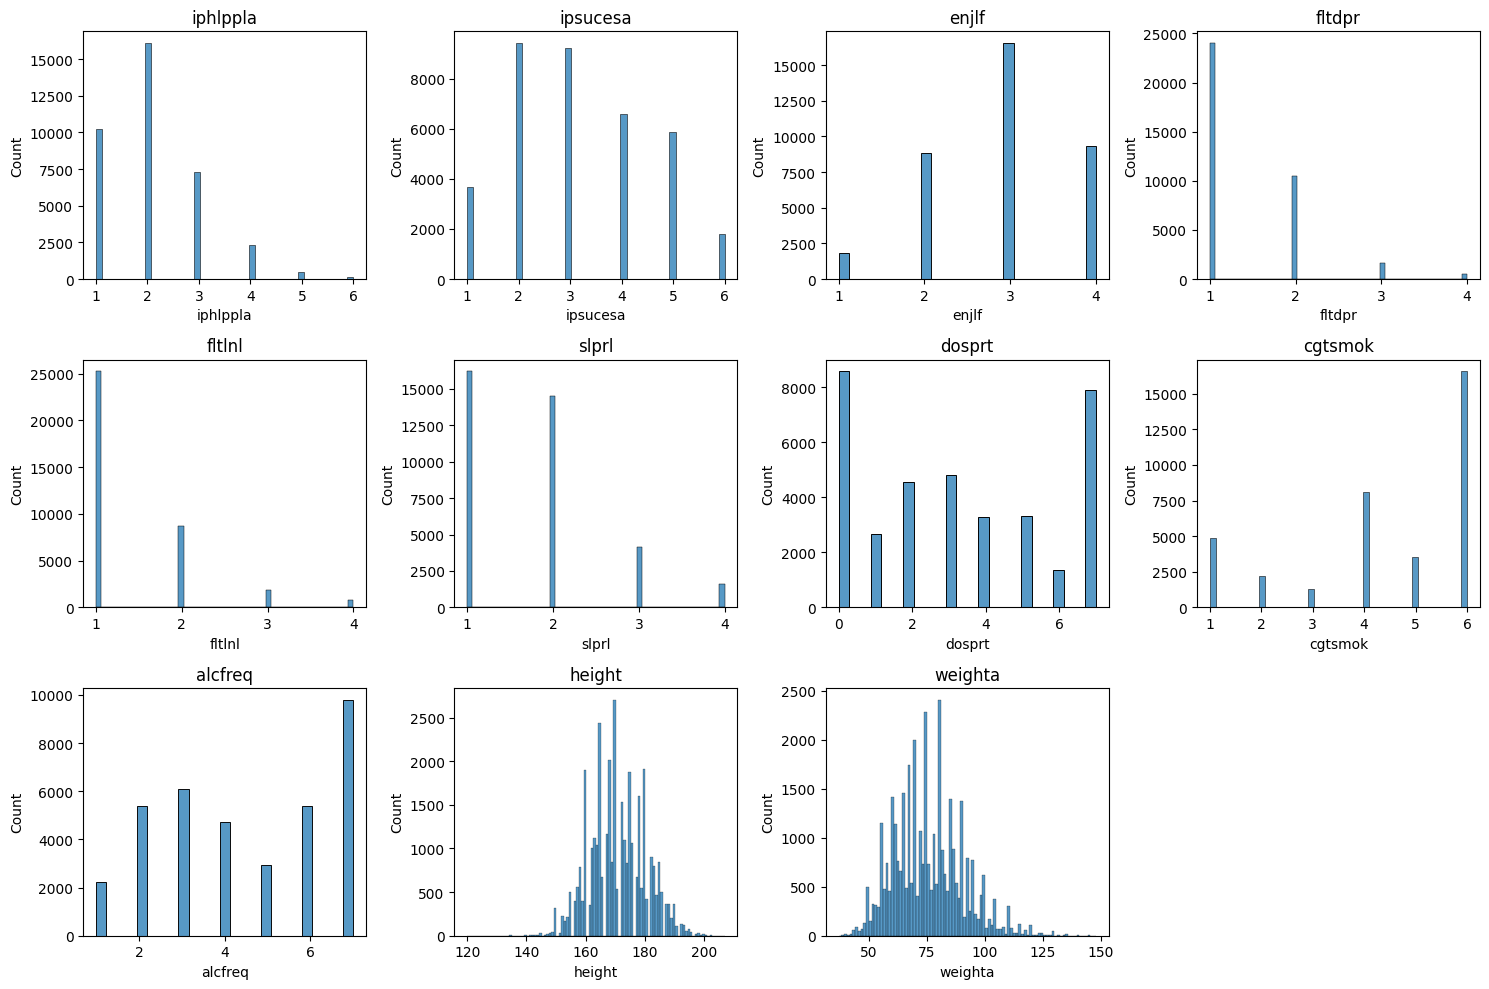

In [30]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_feat.columns, 1):
    plt.subplot(3, 4, i)
    sns.histplot(x=df_feat[column])
    plt.title(column)

plt.tight_layout()
plt.show()

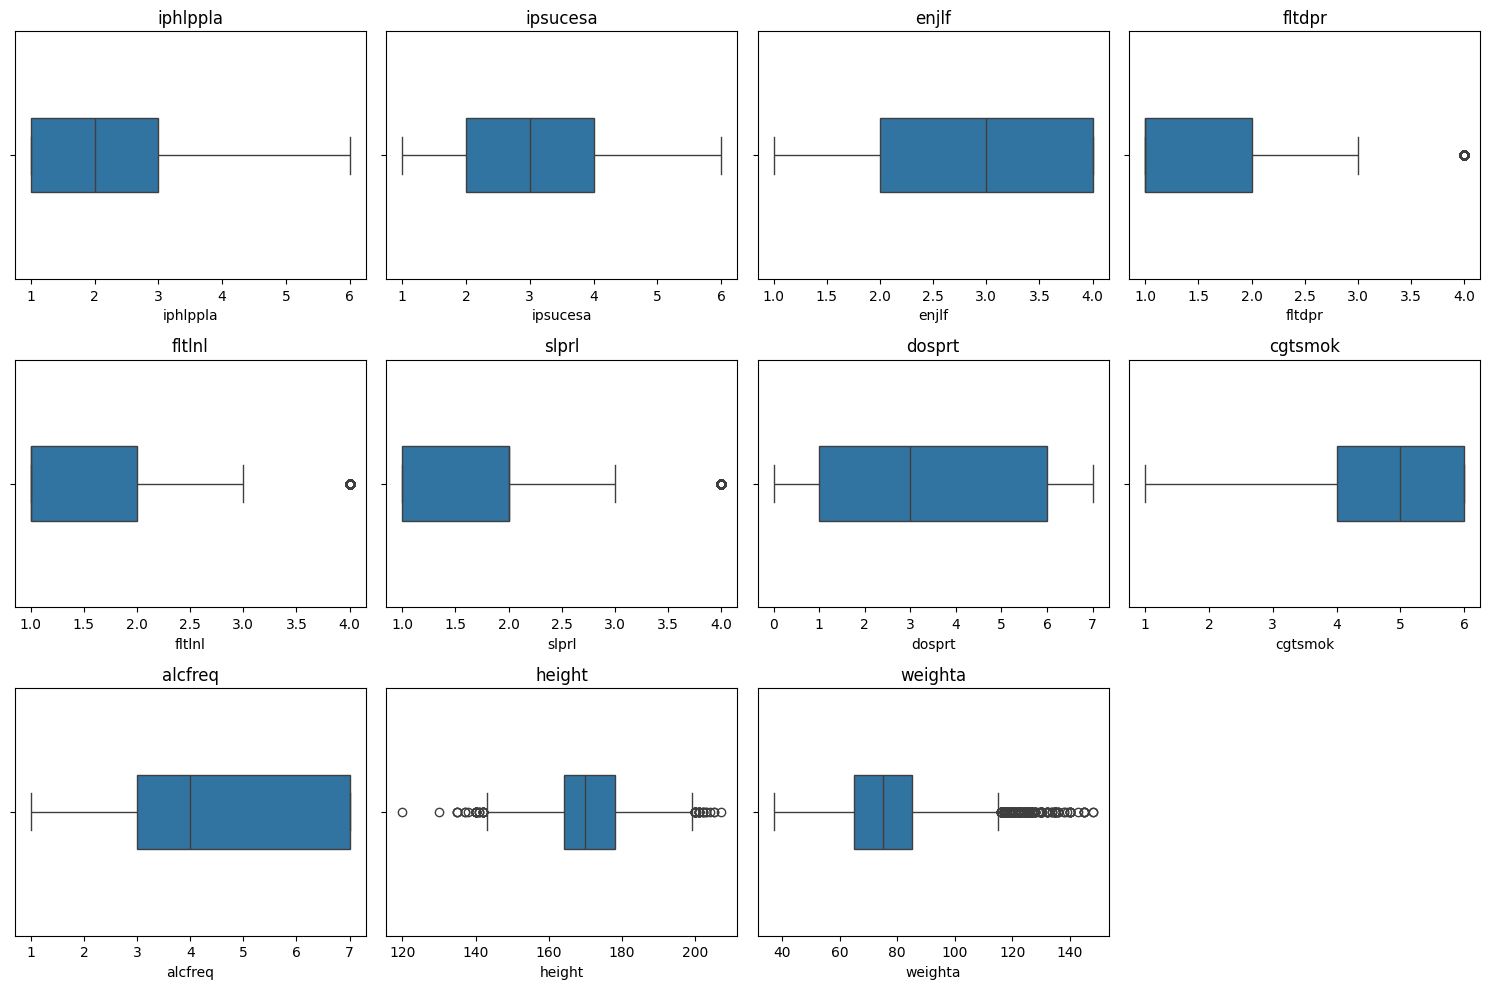

In [31]:
plt.figure(figsize=(15, 10))

for i, column in enumerate(df_feat.columns, 1):
    plt.subplot(3, 4, i)
    sns.boxplot(x=df_feat[column], width=0.3)
    plt.title(column)

plt.tight_layout()
plt.show()

In [32]:
df_feat_with_target = pd.concat([df_feat,df[['happy']]], axis = 1)

In [33]:
df_corr = df_feat_with_target.corr()

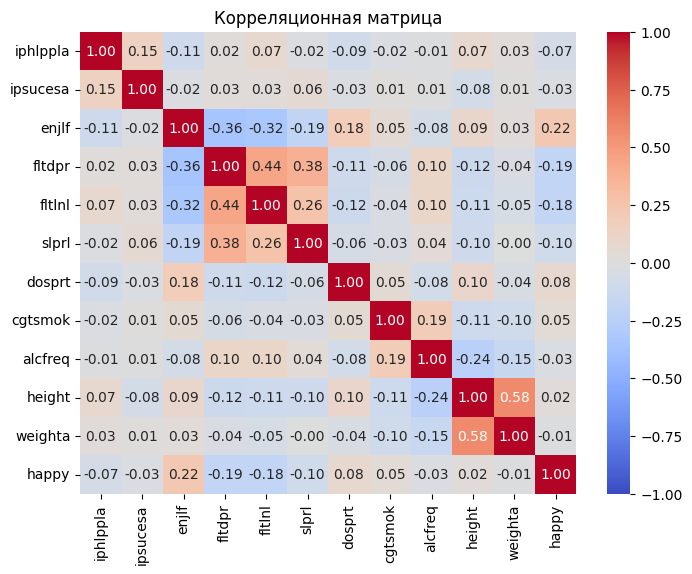

In [34]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_corr , annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Корреляционная матрица")
plt.show()